<center>
<img src="logo.png" height="900"> 
</center>


#  Описательные статистики, визуализация и динозавр

В этой тетрадке мы поговорим о том, ~~почему вымерли динозавры~~ что описательных статистик недостаточно, чтобы понять как устроены данные. Кроме них нужно смотреть ещё и на визуализацию.

Исходники: https://www.autodeskresearch.com/publications/samestats

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

В папке `data` лежит несколько наборов данных, давайте попробуем с ними поработотать.

In [2]:
df = pd.read_csv("data/Datasaurus_data.txt", 
                 header=None, names=['x','y'])
df.head()

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


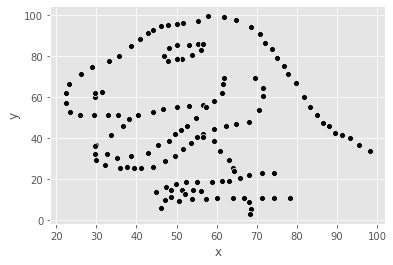

In [3]:
sns.scatterplot('x', 'y', data=df, color="black");

In [4]:
df.x.mean()     # среднее

54.26327323943664

In [5]:
df.x.std(ddof=0) # смещённое стандартное отклонение

16.706005551356668

In [6]:
df.x.std(ddof=1) # несмещённое стандартное отклонение

16.765142039116785

In [7]:
df.corr()        # выборочная корреляция

,x,y
x,1.000000,-0.064472
y,-0.064472,1.000000


In [8]:
def get_values(df):
    """
        Считает по данным описательные статистики
    """
    xm = df.x.mean()
    ym = df.y.mean()
    xsd = df.x.std()
    ysd = df.y.std()
    pc = df.corr().x.y
    return [xm, ym, xsd, ysd, pc]

Напишем функцию для отрисовки картинки и описательных статистик

In [9]:
def show_scatter_and_results(df, labels=["X Mean", "Y Mean", "X SD", "Y SD", "Corr."]):
    
    # нарисовали картинку
    plt.figure(figsize=(15, 5))
    sns.scatterplot('x', 'y', data=df, color="black") 
    plt.xlim(-5, 105)
    plt.ylim(-5, 105)
    plt.tight_layout()
    
    # посчитали статистики
    res = get_values(df)
    
    # нанесли их на картинку
    fs, y_off = 16, -5
    max_label_length = max([len(l) for l in labels])

    plt.text(110, y_off + 80, labels[0].ljust(max_label_length) + \
             ": " + format(res[0], "0.9f")[:-2], fontsize=fs, alpha=0.3)
    plt.text(110, y_off + 65, labels[1].ljust(max_label_length) + \
             ": " + format(res[1], "0.9f")[:-2], fontsize=fs, alpha=0.3)
    plt.text(110, y_off + 50, labels[2].ljust(max_label_length) + \
             ": " + format(res[2], "0.9f")[:-2], fontsize=fs, alpha=0.3)
    plt.text(110, y_off + 35, labels[3].ljust(max_label_length) + \
             ": " + format(res[3], "0.9f")[:-2], fontsize=fs, alpha=0.3)
    plt.text(110, y_off + 20, labels[4].ljust(max_label_length) + \
             ": " + format(res[4], "+.9f")[:-2], fontsize=fs, alpha=0.3)

    plt.text(110, y_off + 80, labels[0].ljust(max_label_length) + \
             ": " + format(res[0], ".9f")[:-7], fontsize=fs, alpha=1)
    plt.text(110, y_off + 65, labels[1].ljust(max_label_length) + \
             ": " + format(res[1], "0.9f")[:-7], fontsize=fs, alpha=1)
    plt.text(110, y_off + 50, labels[2].ljust(max_label_length) + \
             ": " + format(res[2], "0.9f")[:-7], fontsize=fs, alpha=1)
    plt.text(110, y_off + 35, labels[3].ljust(max_label_length) + \
             ": " + format(res[3], "0.9f")[:-7], fontsize=fs, alpha=1)
    plt.text(110, y_off + 20, labels[4].ljust(max_label_length) + \
             ": " + format(res[4], "+.9f")[:-7], fontsize=fs, alpha=1)
    plt.tight_layout(rect=[0, 0, 0.57, 1])

Попробуем использовать.

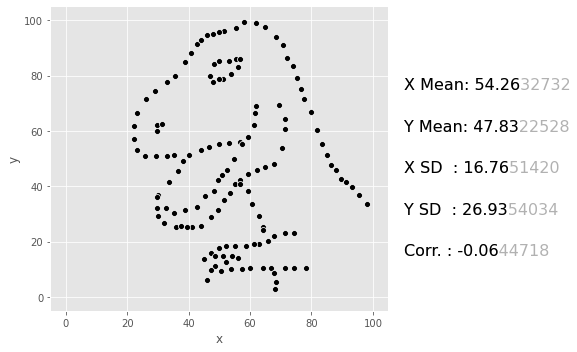

In [10]:
df = pd.read_csv("data/Datasaurus_data.txt",
                 header=None, names=['x','y'])

show_scatter_and_results(df)

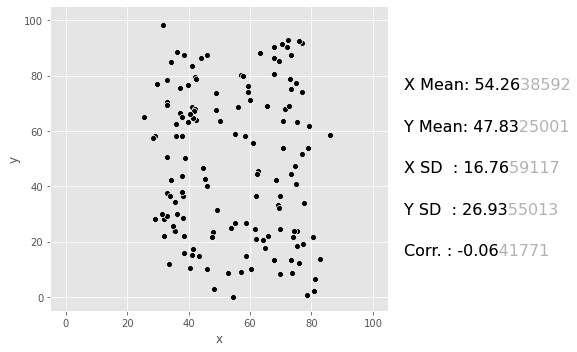

In [11]:
df = pd.read_csv("data/random_cloud.txt")
show_scatter_and_results(df)

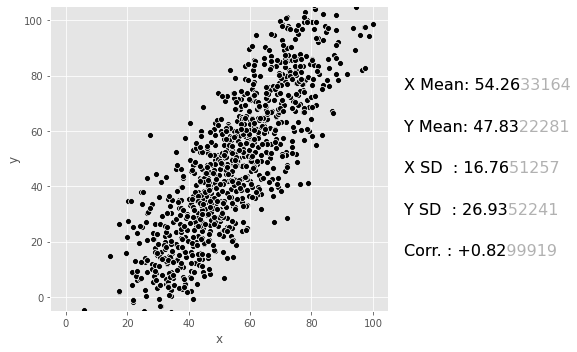

In [13]:
df = pd.read_csv("data/angled_blob.txt")
show_scatter_and_results(df)

По данным самой разной формы можно получать одинаковые описательные статистики. Для того, чтобы понимать данные недостаточно просто посчитать по ним что-то. Их нужно визуализировать. 

![](dinosaurus.png)

Посмотрим на несколько примеров распределений, на которых точки перетекают из одной области в другую, но при этом форма ящика с усами никак не меняется. 

![](boxplots.gif)

![](BoxViolinSmaller.gif)

__Вывод:__ делайте больше различных визуализаций своих данных, если хотите понимать их. 

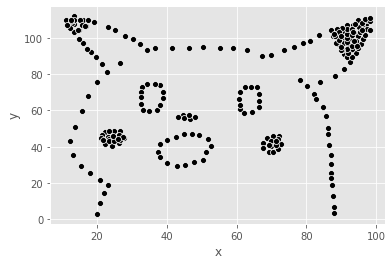

In [14]:
df = pd.read_csv("data/pockemon_2.txt", header=None, names=['x','y'])
sns.scatterplot('x', 'y', data=df, color="black");